# Lecture 2

## Data prep

In [ ]:
import os; os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

In [ ]:
from duckduckgo_search import DDGS
from fastcore.all import *
from fastai.vision.all import *

In [ ]:
SEED = 42

In [ ]:
def search_image(search_str: str, max_items: int=100): return L(DDGS().images(search_str, max_results=max_items)).itemgot("image")

In [ ]:
path = Path("/tmp/")

In [ ]:
from fastdownload import download_url
import time

searches = 'normal car', 'damaged car'

for search in searches:
    dest = path / search
    download_images(dest, urls=search_image(search))
    time.sleep(10)
    download_images(dest, urls=search_image(search + ' on road'))
    time.sleep(10)
    download_images(dest, urls=search_image(search + ' parked'))

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#0) []

## Training the model

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=SEED),
    get_y=parent_label,
    batch_tfms=aug_transforms(mult=2),
    item_tfms=[Resize(192, method="squish")]
).dataloaders(path)

/Users/akhilvempali/miniconda3/envs/ml/lib/python3.9/site-packages/torch/_tensor.py:1386: UserWarning: The operator 'aten::_linalg_solve_ex.result' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/miniforge3/conda-bld/pytorch-recipe_1699324334443/work/aten/src/ATen/mps/MPSFallback.mm:13.)
  ret = func(*args, **kwargs)


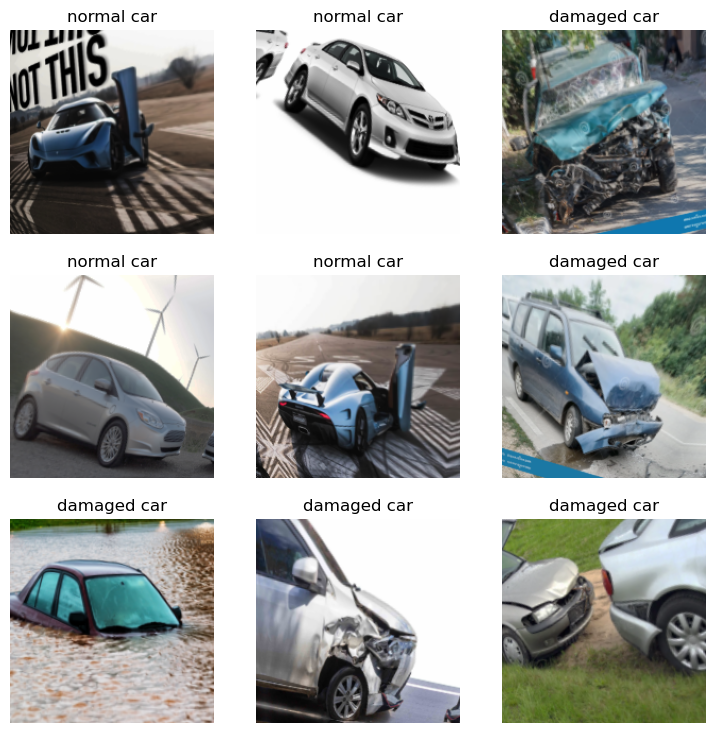

In [ ]:
dls.train.show_batch()

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.923583,0.211899,0.080645,00:34


/Users/akhilvempali/miniconda3/envs/ml/lib/python3.9/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.443422,0.067423,0.016129,00:33
1,0.404157,0.036878,0.000000,00:33
2,0.325895,0.081799,0.032258,00:33
3,0.280252,0.074519,0.016129,00:34
